In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [172]:
df = pd.read_csv('insurance.csv')

In [173]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [175]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [176]:
df['smoker'] = (df['smoker'] == 'yes').astype(np.int)

In [177]:
df['sex'] = (df['sex'] == 'male').astype(np.int)

In [178]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [179]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['region'])
df['region'] = le.transform(df['region'])

In [181]:
dummy = pd.get_dummies(df['region'])
df = pd.concat([df, dummy], axis=1)
df.drop('region', axis=1, inplace=True)

In [182]:
df.rename({0 : 'zero', 1: 'one', 2: 'two', 3: 'three'}, inplace=True, axis=1)

In [183]:
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'zero', 'one',
       'two', 'three'],
      dtype='object')

In [184]:
df.head()

,age,sex,bmi,children,smoker,charges,zero,one,two,three
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [185]:
df.describe()

,age,sex,bmi,children,smoker,charges,zero,one,two,three
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


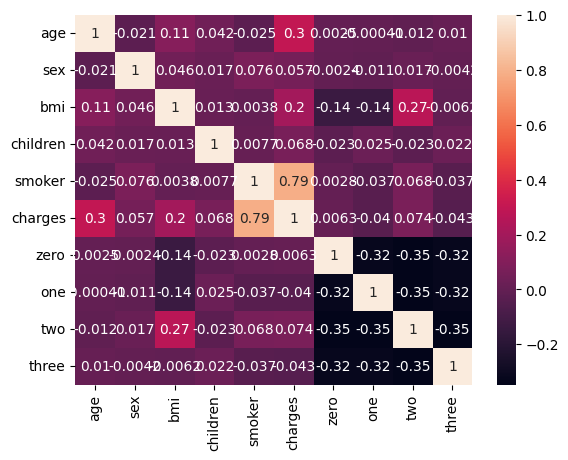

In [153]:
sns.heatmap(df.corr(), annot=True)
plt.show()

<Figure size 2000x2000 with 0 Axes>

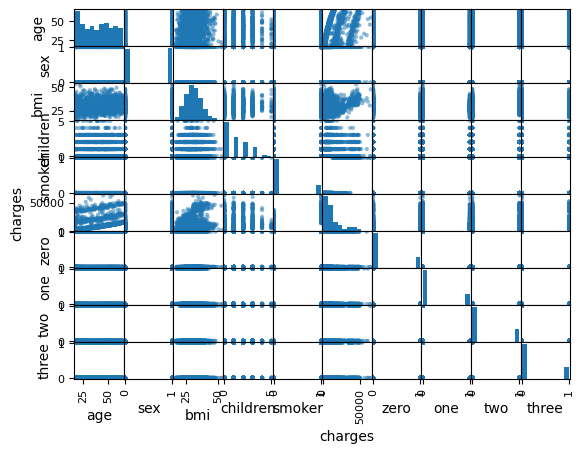

In [154]:
plt.figure(figsize=(20,20))
pd.plotting.scatter_matrix(df)
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('charges', axis=1), df['charges'], train_size=0.8)

In [189]:
X_train

array([[ 0.40008215, -1.02651975,  0.18048051, ..., -0.56943606,
         1.61328658, -0.56367898],
       [-0.88869227, -1.02651975, -1.73808289, ...,  1.75612342,
        -0.61985267, -0.56367898],
       [-0.53069937, -1.02651975,  0.40345531, ...,  1.75612342,
        -0.61985267, -0.56367898],
       ...,
       [-1.38988232, -1.02651975, -0.62810943, ..., -0.56943606,
         1.61328658, -0.56367898],
       [ 1.33086368,  0.97416538, -0.34142754, ...,  1.75612342,
        -0.61985267, -0.56367898],
       [-0.02950932,  0.97416538, -0.72938736, ...,  1.75612342,
        -0.61985267, -0.56367898]])

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.745762048803124

In [192]:
reg.coef_

array([ 3.67997775e+03, -4.25375419e+00,  2.18139790e+03,  5.13471530e+02,
        9.64059307e+03, -2.13813102e+17, -2.16381113e+17, -2.25336216e+17,
       -2.15253832e+17])

In [194]:
from sklearn.metrics import mean_absolute_error
preds = reg.predict(X_test)
mean_absolute_error(y_test, preds)

3926.484452375826

In [195]:
from sklearn.metrics import mean_squared_error
preds = reg.predict(X_test)
mean_squared_error(y_test, preds)

30983616.011743903

In [196]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=5000)
regr.fit(X_train, y_train)

regr.score(X_test, y_test)

0.8265340731828443

In [163]:
from sklearn.metrics import mean_absolute_error
preds = regr.predict(X_test)
mean_absolute_error(y_test, preds)

2648.2910054482477

In [164]:
from sklearn.metrics import mean_squared_error
preds = regr.predict(X_test)
mean_squared_error(y_test, preds)

21024162.134108238

In [165]:
regr.feature_importances_

array([0.13418145, 0.00631037, 0.20675258, 0.01944405, 0.61474793,
       0.00516299, 0.00564365, 0.00440722, 0.00334975])

In [166]:
regr.feature_names_in_

array(['age', 'sex', 'bmi', 'children', 'smoker', 'zero', 'one', 'two',
       'three'], dtype=object)

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test, y_test)

0.866797093353948

In [168]:
from sklearn.metrics import mean_absolute_error
preds = gb_reg.predict(X_test)
mean_absolute_error(y_test, preds)

2294.9852266696553

In [169]:
from sklearn.metrics import mean_squared_error
preds = gb_reg.predict(X_test)
mean_squared_error(y_test, preds)

16232742.756601432

In [170]:
gb_reg.feature_importances_

array([0.11834844, 0.00133733, 0.18284102, 0.00952256, 0.67988741,
       0.0025518 , 0.00402788, 0.00074491, 0.00073864])

In [76]:
gb_reg.feature_names_in_

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype=object)

In [102]:
corr = df.corr()

cor_target = abs(corr["charges"])

relevant_features = cor_target[cor_target>0.05]

names = [index for index, value in relevant_features.iteritems()]

names
names.remove('charges')

In [103]:
X = df[names]
y = df['charges']


In [104]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [105]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [107]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7470374826551485

In [108]:
reg.coef_

array([  247.07051922,  -205.31941871,   341.30897971,   501.6938843 ,
       23791.4421055 ])

In [109]:
reg.feature_names_in_

array(['age', 'sex', 'bmi', 'children', 'smoker'], dtype=object)

In [110]:
from sklearn.metrics import mean_absolute_error
preds = reg.predict(X_test)
mean_absolute_error(y_test, preds)

4246.419563661427

In [111]:
from sklearn.metrics import mean_squared_error
preds = reg.predict(X_test)
mean_squared_error(y_test, preds)

38054249.05410321

In [112]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=5000)
regr.fit(X_train, y_train)

regr.score(X_test, y_test)

0.8092369522589737

In [113]:
from sklearn.metrics import mean_absolute_error
preds = regr.predict(X_test)
mean_absolute_error(y_test, preds)

2973.0933533576663

In [114]:
from sklearn.metrics import mean_squared_error
preds = regr.predict(X_test)
mean_squared_error(y_test, preds)

28697312.96657079

In [115]:
regr.feature_importances_

array([0.12763578, 0.00647177, 0.21998721, 0.02337582, 0.62252942])

In [116]:
regr.feature_names_in_

array(['age', 'sex', 'bmi', 'children', 'smoker'], dtype=object)

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test, y_test)

0.8365436044148891

In [118]:
from sklearn.metrics import mean_absolute_error
preds = gb_reg.predict(X_test)
mean_absolute_error(y_test, preds)

2625.507725952656

In [119]:
from sklearn.metrics import mean_squared_error
preds = gb_reg.predict(X_test)
mean_squared_error(y_test, preds)

24589454.802911054

In [120]:
gb_reg.feature_importances_

array([1.12723515e-01, 4.13719841e-04, 1.89915047e-01, 1.30253605e-02,
       6.83922357e-01])

In [121]:
gb_reg.feature_names_in_

array(['age', 'sex', 'bmi', 'children', 'smoker'], dtype=object)